# Fraud Detection Project - Data Preprocessing and EDA
## 10 Academy: Artificial Intelligence Mastery Week 8&9 Challenge


---

## Table of Contents
1. [Project Setup and Data Loading](#1-project-setup-and-data-loading)
2. [Data Understanding and Initial Exploration](#2-data-understanding-and-initial-exploration)
3. [Data Cleaning and Preprocessing](#3-data-cleaning-and-preprocessing)
4. [Exploratory Data Analysis (EDA)](#4-exploratory-data-analysis-eda)
5. [Feature Engineering](#5-feature-engineering)
6. [Geolocation Analysis](#6-geolocation-analysis)
7. [Class Imbalance Analysis](#7-class-imbalance-analysis)
8. [Key Insights and Patterns](#8-key-insights-and-patterns)
9. [Summary and Next Steps](#9-summary-and-next-steps)

---

## 1. Project Setup and Data Loading

### 1.1 Import Required Libraries

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Statistical analysis
from scipy import stats
from scipy.stats import chi2_contingency, pearsonr

# Machine learning preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ All libraries imported successfully!")
print(f"📊 Analysis started at: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

✅ All libraries imported successfully!
📊 Analysis started at: 2025-07-26 15:18:12


### 1.2 Load Datasets

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import pandas as pd
import zipfile
import os

# Load Fraud_Data.csv
fraud_df = pd.read_csv("/content/drive/MyDrive/kaim 6/week8/data/Fraud_Data.csv")
print(f"✅ Fraud_Data.csv loaded successfully! Shape: {fraud_df.shape}")

# Load IpAddress_to_Country.csv
ip_country_df = pd.read_csv("/content/drive/MyDrive/kaim 6/week8/data/IpAddress_to_Country.csv")
print(f"✅ IpAddress_to_Country.csv loaded successfully! Shape: {ip_country_df.shape}")

# Unzip and load creditcard.csv.zip
zip_file_path = "/content/drive/MyDrive/kaim 6/week8/data/creditcard.csv.zip"
extracted_dir = "/content/drive/MyDrive/kaim 6/week8/data/extracted_creditcard"

# Create the extraction directory if it doesn't exist
if not os.path.exists(extracted_dir):
    os.makedirs(extracted_dir)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)

print(f"✅ Unzipped {zip_file_path} to {extracted_dir}")

# Assuming the extracted file is named creditcard.csv
extracted_file_path = os.path.join(extracted_dir, 'creditcard.csv')

credit_card_df = pd.read_csv(extracted_file_path)

print("✅ Extracted credit card data loaded successfully!")
print(f"creditcard.csv shape: {credit_card_df.shape}")

✅ Fraud_Data.csv loaded successfully! Shape: (151112, 11)
✅ IpAddress_to_Country.csv loaded successfully! Shape: (138846, 3)
✅ Unzipped /content/drive/MyDrive/kaim 6/week8/data/creditcard.csv.zip to /content/drive/MyDrive/kaim 6/week8/data/extracted_creditcard
✅ Extracted credit card data loaded successfully!
creditcard.csv shape: (284807, 31)


## 2. Data Understanding and Initial Exploration

In [9]:
# Dataset overview
print("📊 FRAUD DATASET OVERVIEW")
print("=" * 30)
print(f"Shape: {fraud_df.shape}")
print(f"Features: {list(fraud_df.columns)}")
print("\nData Types:")
print(fraud_df.dtypes)
print("\nMissing Values:")
print(fraud_df.isnull().sum())
print("\nClass Distribution:")
print(fraud_df['class'].value_counts(normalize=True))

📊 FRAUD DATASET OVERVIEW
Shape: (151112, 11)
Features: ['user_id', 'signup_time', 'purchase_time', 'purchase_value', 'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class']

Data Types:
user_id             int64
signup_time        object
purchase_time      object
purchase_value      int64
device_id          object
source             object
browser            object
sex                object
age                 int64
ip_address        float64
class               int64
dtype: object

Missing Values:
user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

Class Distribution:
class
0    0.906354
1    0.093646
Name: proportion, dtype: float64


## 3. Data Cleaning and Preprocessing

In [10]:
def clean_fraud_data(df):
    """Clean and preprocess fraud data"""
    print("🧹 CLEANING DATA...")

    df_clean = df.copy()

    # Convert data types
    df_clean['signup_time'] = pd.to_datetime(df_clean['signup_time'])
    df_clean['purchase_time'] = pd.to_datetime(df_clean['purchase_time'])

    # IP to integer conversion
    # The ip_address column is already float, no need to convert from string
    # Instead, directly cast to integer, handling potential NaNs if any (though none observed)
    df_clean['ip_address_int'] = df_clean['ip_address'].fillna(0).astype(int)


    # Ensure there are still rows after cleaning
    if df_clean.shape[0] == 0:
        print("⚠️ Warning: Cleaned DataFrame is empty!")

    print(f"✅ Cleaned data shape: {df_clean.shape}")
    return df_clean

fraud_df_clean = clean_fraud_data(fraud_df)

🧹 CLEANING DATA...
✅ Cleaned data shape: (151112, 12)


## 4. Exploratory Data Analysis (EDA)

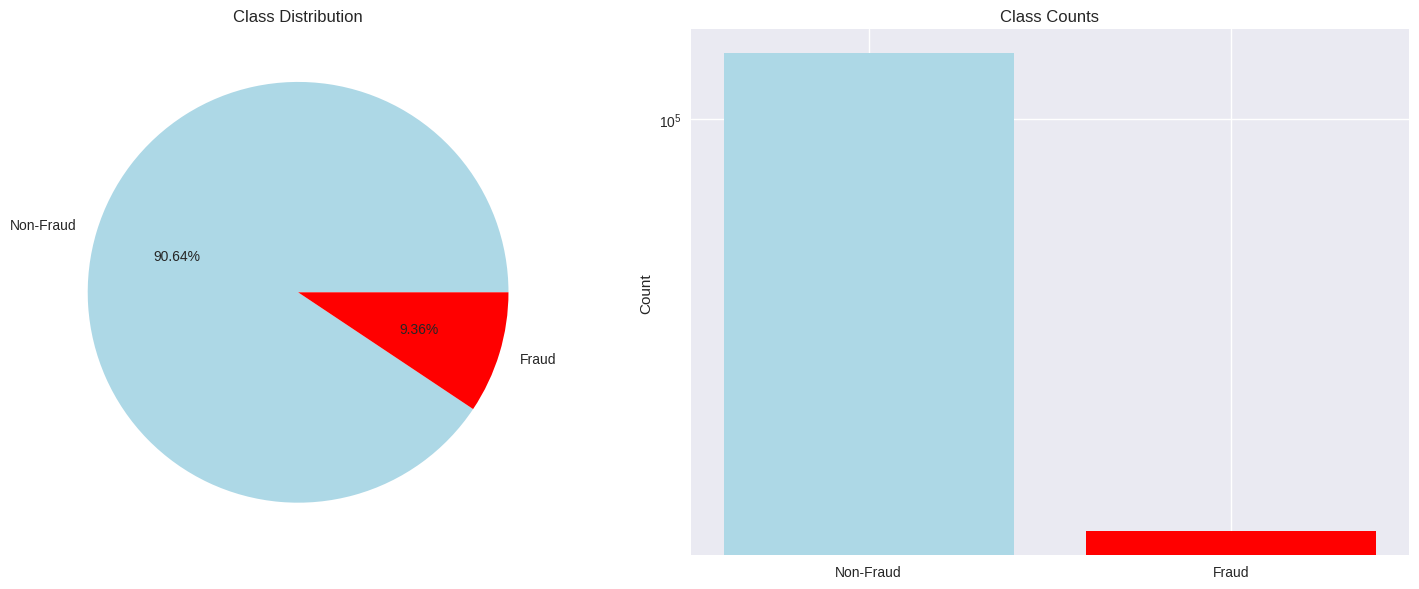

Fraud rate: 9.36%
Imbalance ratio: 9.7:1


In [11]:
# Class distribution visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Check if class_counts is empty
class_counts = fraud_df_clean['class'].value_counts()

if not class_counts.empty:
    # Pie chart
    axes[0].pie(class_counts.values, labels=['Non-Fraud', 'Fraud'], autopct='%1.2f%%', colors=['lightblue', 'red'])
    axes[0].set_title('Class Distribution')

    # Bar chart
    axes[1].bar(['Non-Fraud', 'Fraud'], class_counts.values, color=['lightblue', 'red'])
    axes[1].set_ylabel('Count')
    axes[1].set_title('Class Counts')
    axes[1].set_yscale('log')

    plt.tight_layout()
    plt.show()

    print(f"Fraud rate: {fraud_df_clean['class'].mean()*100:.2f}%")
    print(f"Imbalance ratio: {class_counts[0]/class_counts[1]:.1f}:1")
else:
    print("⚠️ Cannot plot class distribution: fraud_df_clean is empty or contains no class data.")

## 5. Feature Engineering

In [19]:
def create_features(df):
    """Create comprehensive feature set"""
    print("🔧 CREATING FEATURES...")

    # Time features
    df['hour'] = df['purchase_time'].dt.hour
    df['day_of_week'] = df['purchase_time'].dt.dayofweek
    df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)
    df['is_night'] = df['hour'].isin([22, 23, 0, 1, 2, 3, 4, 5]).astype(int)

    # Time since signup
    df['time_since_signup'] = (df['purchase_time'] - df['signup_time']).dt.total_seconds() / 3600
    df['is_new_user'] = (df['time_since_signup'] < 1).astype(int)

    # Value features
    df['is_high_value'] = (df['purchase_value'] > df['purchase_value'].quantile(0.95)).astype(int)

    # User aggregations
    user_stats = df.groupby('user_id').agg({
        'purchase_value': ['count', 'sum', 'mean'],
        'device_id': 'nunique'
    }).reset_index()

    user_stats.columns = ['user_id', 'user_transaction_count', 'user_total_value', 'user_avg_value', 'user_unique_devices']
    df = df.merge(user_stats, on='user_id', how='left')

    # Device aggregations
    device_stats = df.groupby('device_id').agg({
        'purchase_value': ['count', 'sum'],
        'user_id': 'nunique'
    }).reset_index()

    device_stats.columns = ['device_id', 'device_transaction_count', 'device_total_value', 'device_unique_users']
    df = df.merge(device_stats, on='device_id', how='left')

    # Risk indicators
    df['is_shared_device'] = (df['device_unique_users'] > 1).astype(int)
    df['is_young_user'] = (df['age'] < 25).astype(int)
    df['is_ad_source'] = (df['source'] == 'Ads').astype(int)

    print(f"✅ Created features. New shape: {df.shape}")
    return df

fraud_df_features = create_features(fraud_df_clean)

🔧 CREATING FEATURES...
✅ Created features. New shape: (151112, 29)


## 6. Geolocation Analysis

In [20]:
def map_ip_to_country_fast(fraud_df, ip_country_df):
    """Map IP addresses to countries using merge_asof for faster lookup."""
    print("🌍 MAPPING IP TO COUNTRIES...")

    # Ensure ip_country_df has IP columns as int and is sorted by the lower bound for merge_asof
    ip_country_df['lower_bound_ip_address'] = ip_country_df['lower_bound_ip_address'].astype(int)
    ip_country_df['upper_bound_ip_address'] = ip_country_df['upper_bound_ip_address'].astype(int)
    ip_country_df_sorted = ip_country_df.sort_values('lower_bound_ip_address').reset_index(drop=True)


    # Ensure fraud_df is sorted by the ip_address_int for merge_asof
    fraud_df_sorted = fraud_df.sort_values('ip_address_int').reset_index(drop=True)

    # Perform the merge_asof
    # Merge fraud data with the IP country ranges based on ip_address_int and lower_bound_ip_address
    # direction='backward' finds the last row in ip_country_df_sorted where lower_bound_ip_address <= ip_address_int
    merged_df = pd.merge_asof(
        fraud_df_sorted,
        ip_country_df_sorted[['lower_bound_ip_address', 'upper_bound_ip_address', 'country']],
        left_on='ip_address_int',
        right_on='lower_bound_ip_address',
        direction='backward'
    )

    # Filter to keep only valid matches where the IP address is within the upper bound of the matched range
    # This is necessary because merge_asof with 'backward' only guarantees ip_address_int >= lower_bound_ip_address
    valid_ip_mapping = merged_df[merged_df['ip_address_int'] <= merged_df['upper_bound_ip_address']].copy()

    # Create the final country column
    # Initialize country column with 'Unknown' in the original fraud_df order
    fraud_df['country'] = 'Unknown'

    # For the valid matches, update the country in the original fraud_df
    # We need to merge the country back to the original fraud_df based on a common key, e.g., user_id
    # First, ensure 'user_id' is in valid_ip_mapping and is unique
    valid_ip_mapping = valid_ip_mapping[['user_id', 'country']].drop_duplicates(subset=['user_id'])

    # Merge the valid countries back to the original fraud_df
    fraud_df = pd.merge(
        fraud_df,
        valid_ip_mapping,
        on='user_id',
        how='left',
        suffixes=('', '_mapped')
    )

    # Update the 'country' column with mapped countries where available
    fraud_df['country'] = fraud_df['country_mapped'].fillna(fraud_df['country'])

    # Drop the temporary merged country column
    fraud_df = fraud_df.drop(columns=['country_mapped'])


    print(f"✅ Mapped {fraud_df['country'].nunique()} unique countries (FAST)")
    return fraud_df

# Replace the original mapping call with the faster one
fraud_df_geo = map_ip_to_country_fast(fraud_df_features, ip_country_df.copy()) # Pass a copy to avoid modifying the original ip_country_df

# Country fraud analysis (keep this as is)
country_fraud = fraud_df_geo.groupby('country')['class'].agg(['count', 'sum', 'mean']).reset_index()
country_fraud.columns = ['country', 'total_transactions', 'fraud_count', 'fraud_rate']
country_fraud = country_fraud.sort_values('fraud_rate', ascending=False)

print("\n🔴 TOP COUNTRIES BY FRAUD RATE:")
print(country_fraud.head())

🌍 MAPPING IP TO COUNTRIES...
✅ Mapped 182 unique countries (FAST)

🔴 TOP COUNTRIES BY FRAUD RATE:
                   country  total_transactions  fraud_count  fraud_rate
166           Turkmenistan                   1            1    1.000000
115                Namibia                  23           10    0.434783
154              Sri Lanka                  31           13    0.419355
98              Luxembourg                  72           28    0.388889
178  Virgin Islands (U.S.)                   3            1    0.333333


In [22]:
# Create a world map visualization of fraud rates by country
fig = px.choropleth(country_fraud,
                    locations="country",
                    locationmode='country names',
                    color="fraud_rate",
                    hover_name="country",
                    hover_data=['total_transactions', 'fraud_count', 'fraud_rate'],
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='World Map of Fraud Rate by Country')
fig.update_layout(margin={"r":0,"l":0,"t":40,"b":0})
fig.show()

## 7. Class Imbalance Analysis

In [23]:
# Detailed imbalance analysis
class_counts = fraud_df_geo['class'].value_counts()
imbalance_ratio = class_counts[0] / class_counts[1]

print("⚖️ CLASS IMBALANCE ANALYSIS")
print("=" * 30)
print(f"Non-Fraud: {class_counts[0]:,} ({class_counts[0]/len(fraud_df_geo)*100:.2f}%)")
print(f"Fraud: {class_counts[1]:,} ({class_counts[1]/len(fraud_df_geo)*100:.2f}%)")
print(f"Imbalance Ratio: {imbalance_ratio:.1f}:1")

# Recommended strategy
if imbalance_ratio > 20:
    strategy = "SMOTE with 30% target ratio + ensemble methods"
elif imbalance_ratio > 10:
    strategy = "SMOTE with 40% target ratio"
else:
    strategy = "Class weights or cost-sensitive learning"

print(f"\n💡 RECOMMENDED STRATEGY: {strategy}")

⚖️ CLASS IMBALANCE ANALYSIS
Non-Fraud: 136,961 (90.64%)
Fraud: 14,151 (9.36%)
Imbalance Ratio: 9.7:1

💡 RECOMMENDED STRATEGY: Class weights or cost-sensitive learning


## 8. Key Insights and Patterns

In [24]:
# Feature correlation analysis
numerical_features = fraud_df_geo.select_dtypes(include=[np.number]).columns.tolist()
exclude_cols = ['user_id', 'device_id', 'ip_address_int', 'class']
analysis_features = [col for col in numerical_features if col not in exclude_cols]

correlations = []
for feature in analysis_features:
    if fraud_df_geo[feature].nunique() > 1:
        corr, p_value = pearsonr(fraud_df_geo[feature], fraud_df_geo['class'])
        correlations.append({
            'feature': feature,
            'correlation': corr,
            'abs_correlation': abs(corr),
            'p_value': p_value
        })

correlation_df = pd.DataFrame(correlations)
correlation_df = correlation_df.sort_values('abs_correlation', ascending=False)

print("🎯 TOP 10 FEATURES BY CORRELATION WITH FRAUD:")
print("=" * 50)
for _, row in correlation_df.head(10).iterrows():
    direction = "↗️" if row['correlation'] > 0 else "↘️"
    print(f"{row['feature']:<25} {direction} {row['correlation']:>7.4f} (p={row['p_value']:.2e})")

🎯 TOP 10 FEATURES BY CORRELATION WITH FRAUD:
is_new_user               ↗️  0.7141 (p=0.00e+00)
device_transaction_count  ↗️  0.6708 (p=0.00e+00)
device_unique_users       ↗️  0.6708 (p=0.00e+00)
device_total_value        ↗️  0.5753 (p=0.00e+00)
is_shared_device          ↗️  0.5665 (p=0.00e+00)
time_since_signup         ↘️ -0.2579 (p=0.00e+00)
day_of_week               ↗️  0.0189 (p=1.80e-13)
is_weekend                ↗️  0.0141 (p=3.87e-08)
is_night                  ↘️ -0.0094 (p=2.67e-04)
age                       ↗️  0.0066 (p=1.00e-02)


## 9. Summary and Next Steps

In [29]:
import os

print("📋 PREPROCESSING SUMMARY")
print("=" * 25)
print(f"✅ Dataset processed: {fraud_df_geo.shape}")
print(f"✅ Features created: {len(fraud_df_geo.columns)}")
print(f"✅ Countries mapped: {fraud_df_geo['country'].nunique()}")
print(f"✅ Fraud rate: {fraud_df_geo['class'].mean()*100:.2f}%")
print(f"✅ Imbalance ratio: {imbalance_ratio:.1f}:1")



# Define the directory path
save_directory = '../data/processed'

# Create the directory if it doesn't exist
os.makedirs(save_directory, exist_ok=True)

# Save processed data
fraud_df_geo.to_csv(os.path.join(save_directory, 'fraud_data_processed.csv'), index=False)
print(f"\n💾 Processed data saved to {os.path.join(save_directory, 'fraud_data_processed.csv')}")

📋 PREPROCESSING SUMMARY
✅ Dataset processed: (151112, 30)
✅ Features created: 30
✅ Countries mapped: 182
✅ Fraud rate: 9.36%
✅ Imbalance ratio: 9.7:1

💾 Processed data saved to ../data/processed/fraud_data_processed.csv


### 6.1 Country Fraud Visualization